## Задание 1
Условие: Реализуйте градиентный спуск с постоянный шагом (learning rate). Исследовать сходимость при различных значениях шага

Функция: $x^2y^2ln(2x^2+3y^2)$

Точка минимума: $(\pm \frac{1}{2e^{1/4}}, \pm \frac{1}{\sqrt{6} e^{1/4}})$

Приблизительно: (0.389400, 0.317944)


In [111]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, formatter={'float_kind': '{:f}'.format})
plt.rcParams["figure.figsize"] = (20, 10)

In [112]:
grad_cnt = 0
f1_cnt = 0

In [113]:
def partial(f, i, x):
    h = 1e-3
    x[i] = x[i] + h
    right = f(x)
    x[i] = x[i] - 2 * h
    left = f(x)
    x[i] = x[i] + h
    return (right - left) / (2 * h)


def grad(f, x):
    global grad_cnt
    grad_cnt += 1
    return [partial(f, i, x) for i in range(len(x))]
    # return [2*x[0]*x[1]**2 * ((2*x[0]**2)/(2*x[0]**2+3*x[1]**2) + np.log(2*x[0]**2+3*x[1]**2)), 2*x[0]**2*x[1] * ((3*x[1]**2)/(2*x[0]**2+3*x[1]**2) + np.log(2*x[0]**2+3*x[1]**2))]

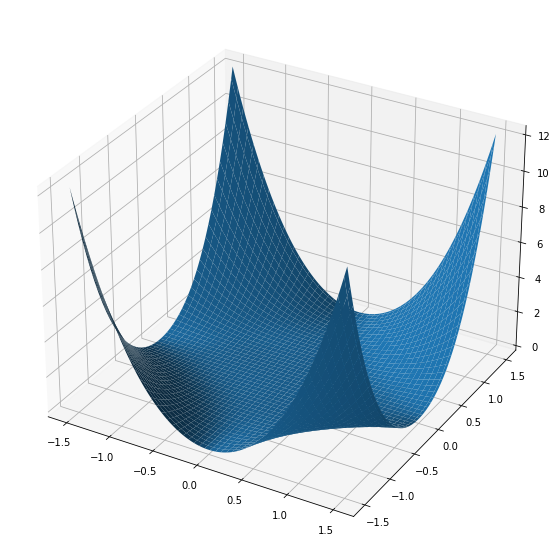

In [114]:
def f1(x):
    global f1_cnt
    f1_cnt += 1
    return x[0] ** 2 * x[1] ** 2 * np.log(2 * x[0] ** 2 + 3 * x[1] ** 2)


t = np.linspace(-1.5, 1.5, 100)
X = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X[0], X[1], f1(X))

In [115]:
def const_lr(n, start):
    return start


def GB(f, lr, start, lr_strategy=const_lr, epoch=20, draw=False):
    global grad_cnt
    grad_cnt = 0
    global f1_cnt
    f1_cnt = 0

    x = start
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr_strategy(i, lr) * np.array(grad(f, x))
        points[i] = x
    if draw:
        plt.plot(points[:, 0], points[:, 1], 'o-')
        plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points] + list(np.linspace(-1, 1, 100))))
    return points

array([0.395321, 0.322228])

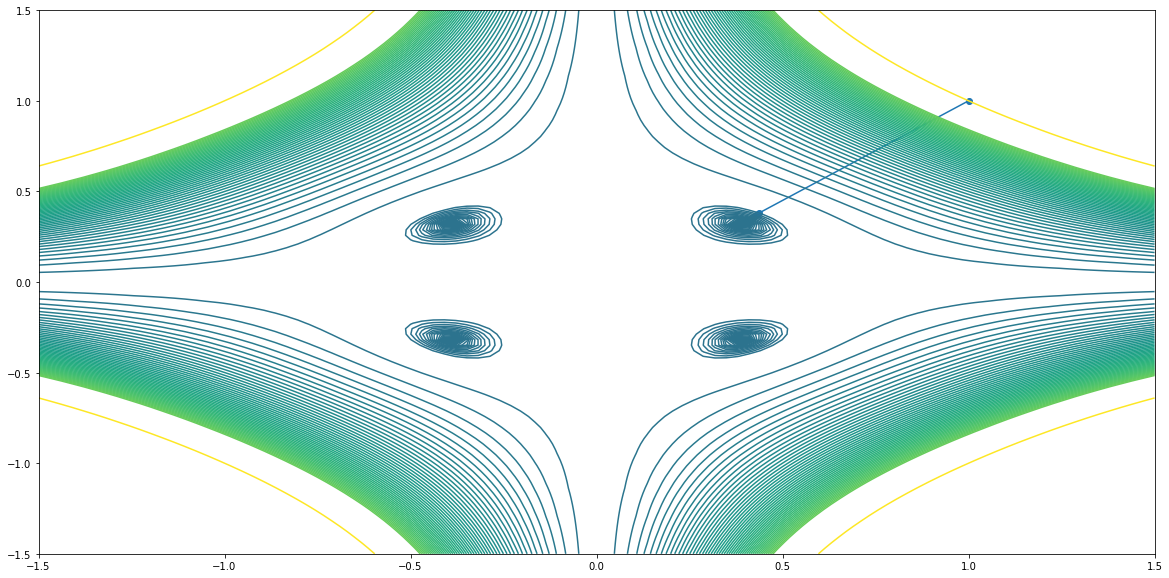

In [116]:
GB(f1, 0.14, start=[1, 1], epoch=30, draw=True)[-1]

array([-0.378289, -0.324127])

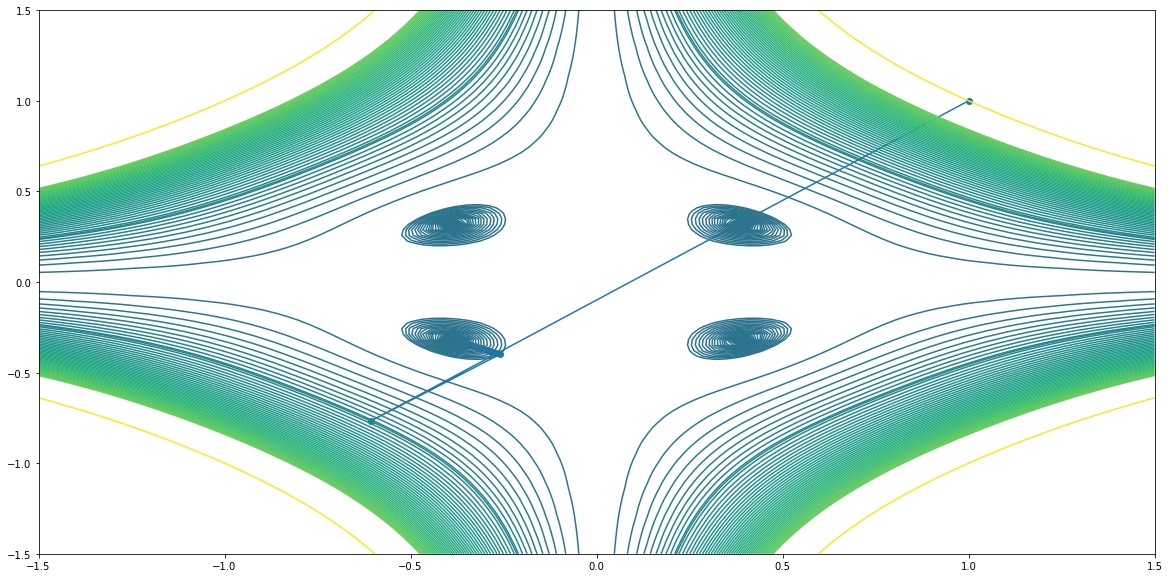

In [117]:
GB(f1, 0.4, start=[1, 1], epoch=30, draw=True)[-1]

array([0.392709, 0.316053])

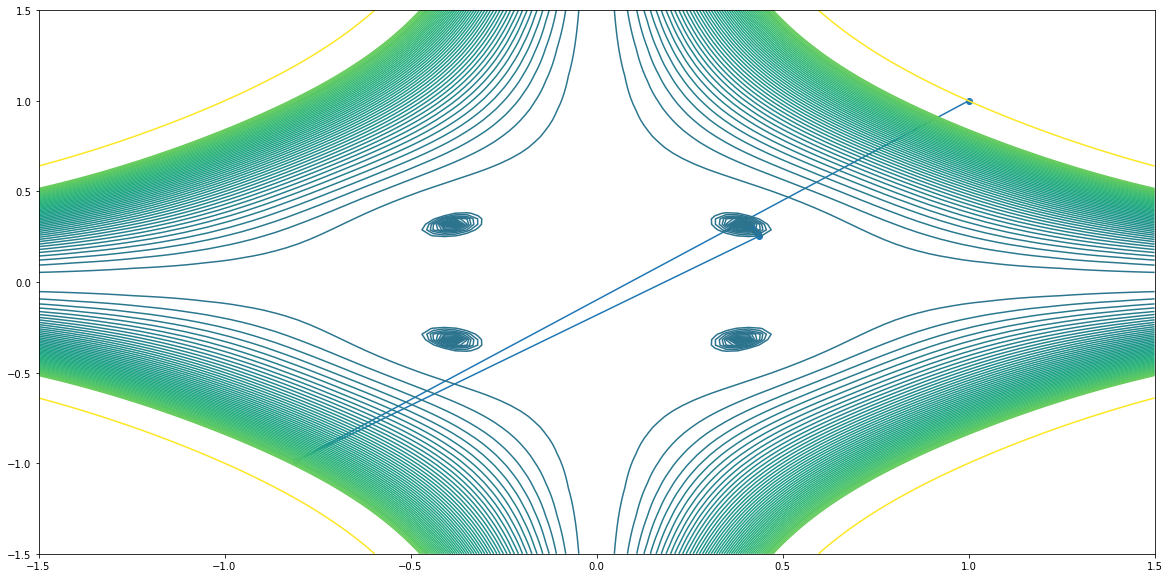

In [118]:
GB(f1, 0.45, start=[1, 1], epoch=30, draw=True)[-1]

array([0.382255, 0.317268])

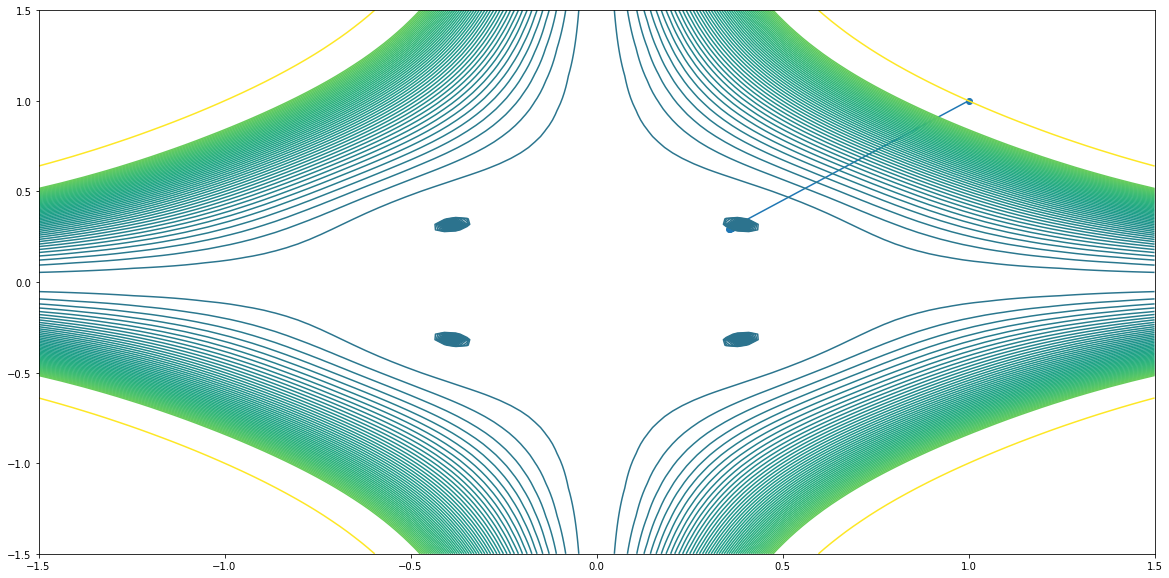

In [119]:
GB(f1, 0.16, start=[1, 1], epoch=30, draw=True)[-1]

## Задание 2
Условие: Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость. Например экспоненциальную или ступенчатую

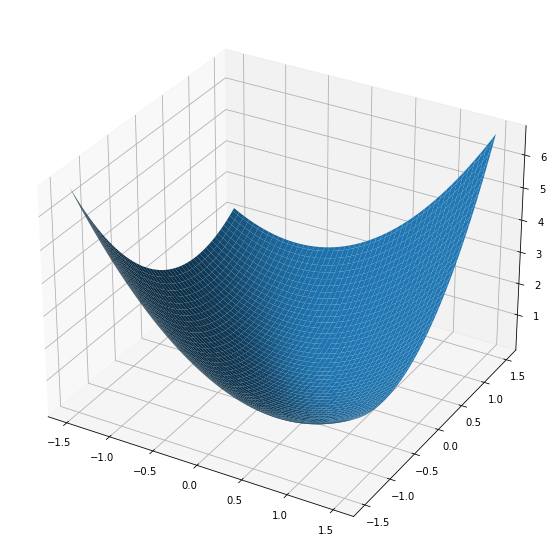

In [120]:
def f2(x):
    return x[0] ** 2 + x[1] ** 2 + x[0] * x[1]


t = np.linspace(-1.5, 1.5, 100)
X = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X[0], X[1], f2(X))

In [121]:
def exp_lr(n, start):
    k = 0.1
    return start * np.exp(-k * n)

In [122]:
print("Constant learning rate: ", GB(f2, 0.6, start=[1, 1], epoch=10)[-1])
print("Exponential decay learning rate: ", GB(f2, 0.6, start=[1, 1], epoch=10, lr_strategy=exp_lr)[-1])

Constant learning rate:  [-0.134218 -0.134218]
Exponential decay learning rate:  [-0.000000 -0.000000]


In [123]:
print("Constant learning rate: ", GB(f2, 0.5, start=[1, 1], epoch=10)[-1])
print("Exponential decay learning rate: ", GB(f2, 0.5, start=[1, 1], epoch=10, lr_strategy=exp_lr)[-1])

Constant learning rate:  [-0.001953 -0.001953]
Exponential decay learning rate:  [0.000000 0.000000]



## Задание 3
Условие: Реализовать какой-нибудь метод одномерного поиска (дихотомия, метод Фибоначчи, метод золотого сечения) и градиентный спуск на его основе. Сравнить эффективность с точки зрения количества вычислений минимизируемой функции и ее градиетов

In [124]:
def u(a, x_k):
    return f1(x_k - a * np.array(grad(f1, x_k)))

In [125]:
def find_seg(x_k):
    a = 0.6

    ux_0 = u(0, x_k)
    ux_1 = u(a, x_k)

    if ux_1 < ux_0:

        a = a * 3
        ux_2 = u(a, x_k)

        while ux_1 > ux_2:

            a *= 1.3
            ux_2 = u(a, x_k)

    return [0, a]


In [126]:
def dih(a, b, x_k):
    h = 1e-5
    while b - a > 0.1:
        m = (a + b) / 2
        left = u(m - h, x_k)
        right = u(m + h, x_k)
        if left < right:
            b = m + h
        elif left > right:
            a = m - h
    return x_k - a * np.array(grad(f1, x_k))

In [127]:
def dihGB():
    x_prev = [1, 1]

    global grad_cnt
    grad_cnt = 0

    global f1_cnt
    f1_cnt = 0

    seg = find_seg(x_prev)

    x = dih(seg[0], seg[1], x_prev)

    cnt = 0
    while True:
        cnt += 1
        if np.linalg.norm(x - x_prev) < 0.01:
            break
        seg = find_seg(x)

        x_prev = x
        x = dih(seg[0], seg[1], x)

    print("Found min: ", x)
    print("Number of iterations: ", cnt)

    print("Number of calls grad eval: ", grad_cnt)
    print("Number of calls f1 eval: ", f1_cnt)

In [128]:
dihGB()

Found min:  [-0.387722 -0.318325]
Number of iterations:  5
Number of calls grad eval:  97
Number of calls f1 eval:  480


In [129]:
GB(f1, 0.2, start=[1,1], epoch=110, draw=False)[-1]

array([0.387853, 0.318736])

In [130]:
print("Number of calls grad eval: ", grad_cnt)
print("Number of calls f1 eval: ",f1_cnt)

Number of calls grad eval:  109
Number of calls f1 eval:  436


для GB(0,2) понадобилось примерно 110 итераций, это около 545 вычислений функции и градиента
для дихотомии понадобилось 577 вычислений функции и градиента

## Задание 5
Условие: Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте 2-3 квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.

Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага?

In [131]:
def small(x):
    return 1 / 100 * (x[0] ** 2 + x[1] ** 2)


def big(x):
    return 100 * (x[0] ** 2 + x[1] ** 2)


def normal(x):
    return x[0] ** 2 + x[1] ** 2

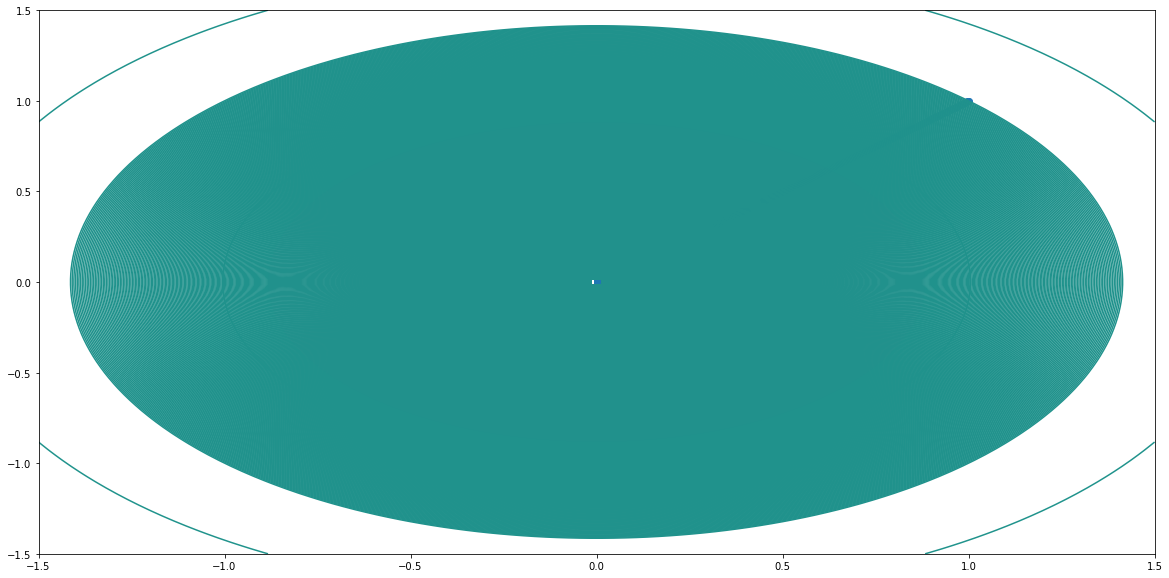

In [136]:
GB(small, 0.16, start=[1,1], epoch=2000, draw=True)[-1]
small_res = GB(small, 0.16, start=[1,1], epoch=2000, draw=False)[-1]
small_grad_call = grad_cnt

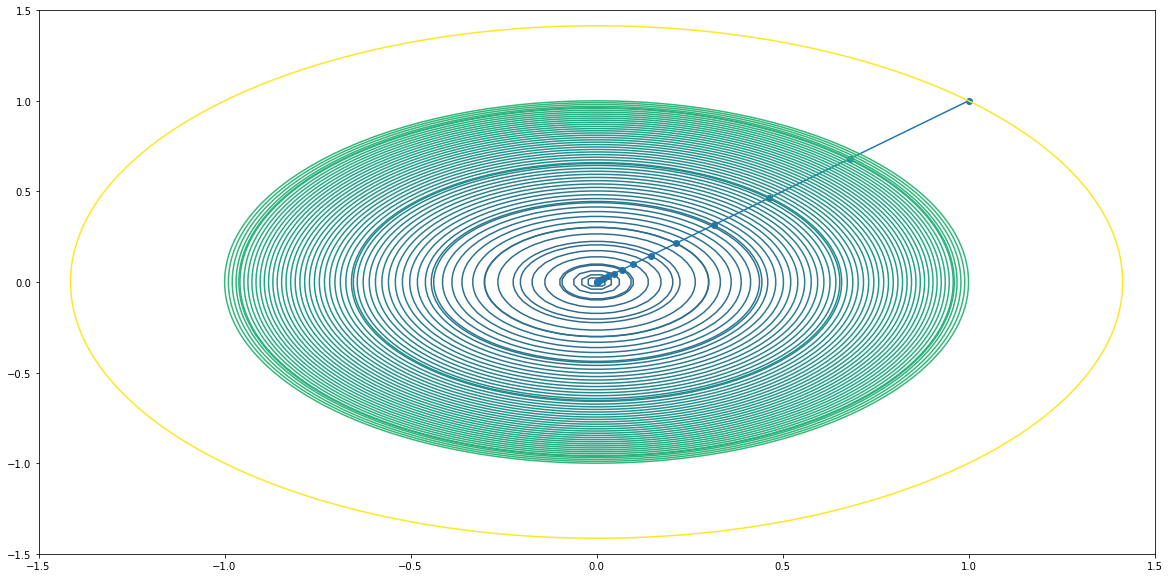

In [137]:
GB(normal, 0.16, start=[1,1], epoch=19, draw=True)[-1]
normal_res = GB(normal, 0.16, start=[1,1], epoch=19, draw=False)[-1]
normal_grad_call = grad_cnt

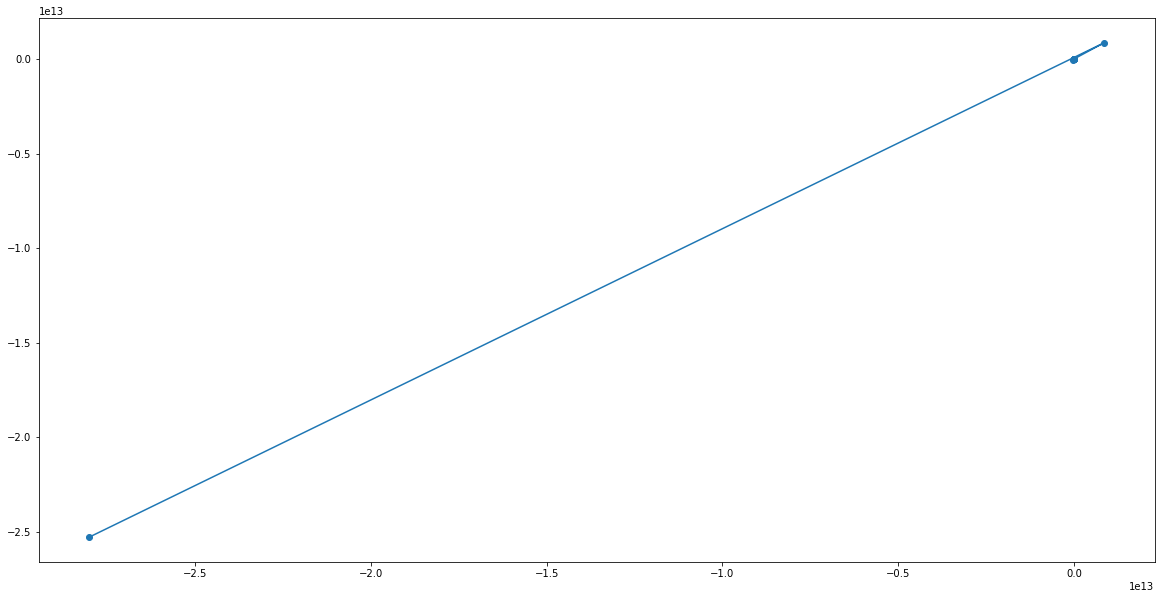

In [138]:
GB(big, 0.16, start=[1,1], epoch=10, draw=True)
big_res = GB(big, 0.16, start=[1,1], epoch=10, draw=False)[-1]
big_grad_call = grad_cnt

In [146]:
from pandas import DataFrame

data = [["Small ", small_grad_call, small_res, [0.0, 0.0]], ["Normal", normal_grad_call, normal_res, [0.0, 0.0]], ["Big", '-', big_res, [0.0, 0.0]]]

DataFrame(data, columns=["Condition number", "Number of grad calls", "Result", "Expected"])

Condition number Number of grad calls  \
0           Small                  1999   
1           Normal                   18   
2              Big                    -   

                                           Result    Expected  
0   [0.001649873324663958, 0.0016498733246639607]  [0.0, 0.0]  
1  [0.0009664078048402913, 0.0009664078048402915]  [0.0, 0.0]  
2          [-28011909463711.5, -25263127775391.5]  [0.0, 0.0]

#### Вывод:
 При высоком числе обусловленности метод может начать расходиться, а при низком числе обусловленности алгоритм сходится довольно медленно и может потребоваться много итераций для поиска минимума.

Выбор начальной точки в квадратичной функции почти не влияет на направление спуска. Только на число обусловленности. Однако при рассмотрении функций с несколькими локальными минимума начальная точка играет важную роль: она определяет к какому из локальных минимумов будет сходиться алгоритм.

Выбор стратегии шага влияет на скорость сходимости. При неудачной стратегии алгоритм может перестать сходиться или же сходиться очень медленно. А при выборе хорошей стратегии градиентный спуск находит минимум быстро.